# **Multiple Linear Regression Analysis on Startup Dataset: From Data Preparation to Prediction**

This notebook demonstrates multiple linear regression with scikit-learn. It includes steps for importing and preparing data, encoding categorical variables, splitting into training and test sets, training a LinearRegression model, and predicting results. Finally, it compares predicted values with actual test set values.

### **Multiple Linear Regression**

Multiple linear regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. It's an extension of simple linear regression, which deals with just one independent variable.

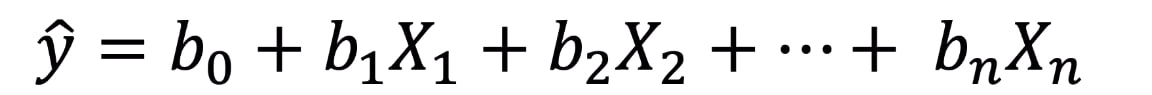

### **Assumptions of Linear Regression**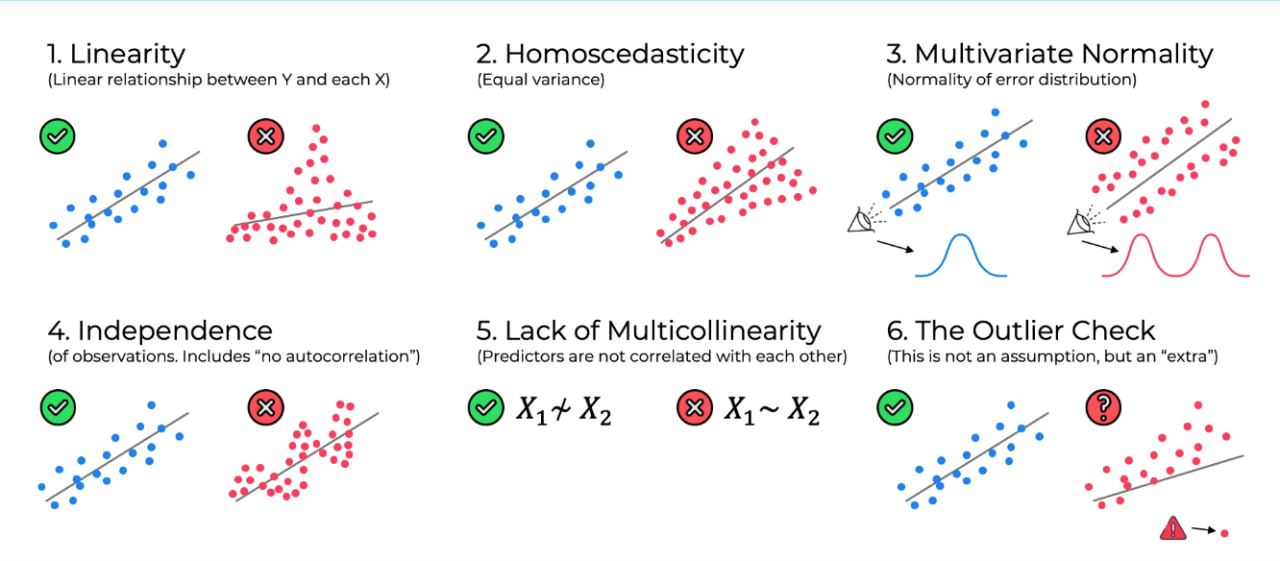

## Importing the libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The dataset, titled "50 Startups", contains information about 50 startup companies. The primary objective is to predict the profit of these startups based on four key features. The dataset includes the following columns:


#### **Dataset Description**

**R&D Spend**: The amount of money spent on research and development (in thousands of dollars).

**Administration**: The amount of money spent on administrative expenses (in thousands of dollars).

**Marketing Spend**: The amount of money spent on marketing and promotions (in thousands of dollars).

**State**: The state where the startup is located (categorical variable with states like New York, California, and Florida).

**Profit**: The profit generated by the startup (in thousands of dollars), which is the target variable we aim to predict.

In [30]:
# Read datset
dataset = pd.read_csv('50_Startups.csv')
print(dataset[:10])

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96


In [31]:
# Seperate to Independent(X) and dependent(Y) variabless
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [32]:
# Print Independent Variable array
print(X[:10])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']]


In [33]:
# Print Dependent Variable array
print(y[:10])

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96]


## Encoding categorical data

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# transform catogerical data in to oneHotEncoded data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
# X after Encoded
print(X[:10])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]]


## Splitting the dataset into the Training set and Test set

In [36]:
# Split the data using Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [39]:
# we use same class to do simple linear regression and multiple linear regression.
from sklearn.linear_model import LinearRegression

# Impliment linearRegression
regressor = LinearRegression()

# Fit X_train and y_train
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [38]:
# Get the predictions
y_pred = regressor.predict(X_test)

# Get the report with Y_test and the Y pred.
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
